## **การกำหนดลักษณะของกราฟ**

In [3]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
theme_set(theme_void())
 
# data: edge list
d1 <- data.frame(from="origin", to=paste("group", seq(1,7), sep=""))
d2 <- data.frame(from=rep(d1$to, each=7), to=paste("subgroup", seq(1,49), sep="_"))
edges <- rbind(d1, d2)
 
# We can add a second data frame with information for each node!
name <- unique(c(as.character(edges$from), as.character(edges$to)))
vertices <- data.frame(
  name=name,
  group=c( rep(NA,8) ,  rep( paste("group", seq(1,7), sep=""), each=7)),
  cluster=sample(letters[1:4], length(name), replace=T),
  value=sample(seq(10,30), length(name), replace=T)
)
 
# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices)

Warning message:
"New theme missing the following elements: axis.title.x, axis.title.x.top, axis.title.y, axis.title.y.right, axis.text.x, axis.text.x.top, axis.text.y, axis.text.y.right, axis.ticks, axis.line, axis.line.x, axis.line.y, legend.background, legend.margin, legend.spacing, legend.spacing.x, legend.spacing.y, legend.key, legend.key.height, legend.key.width, legend.text.align, legend.title.align, legend.direction, legend.justification, legend.box.margin, legend.box.background, legend.box.spacing, panel.background, panel.border, panel.spacing.x, panel.spacing.y, panel.grid, panel.grid.minor, plot.background, strip.background, strip.placement, strip.text.x, strip.text.y"


## **รูปแบบ circular และ linear**

- #### โดยใช้ argument **layout** 

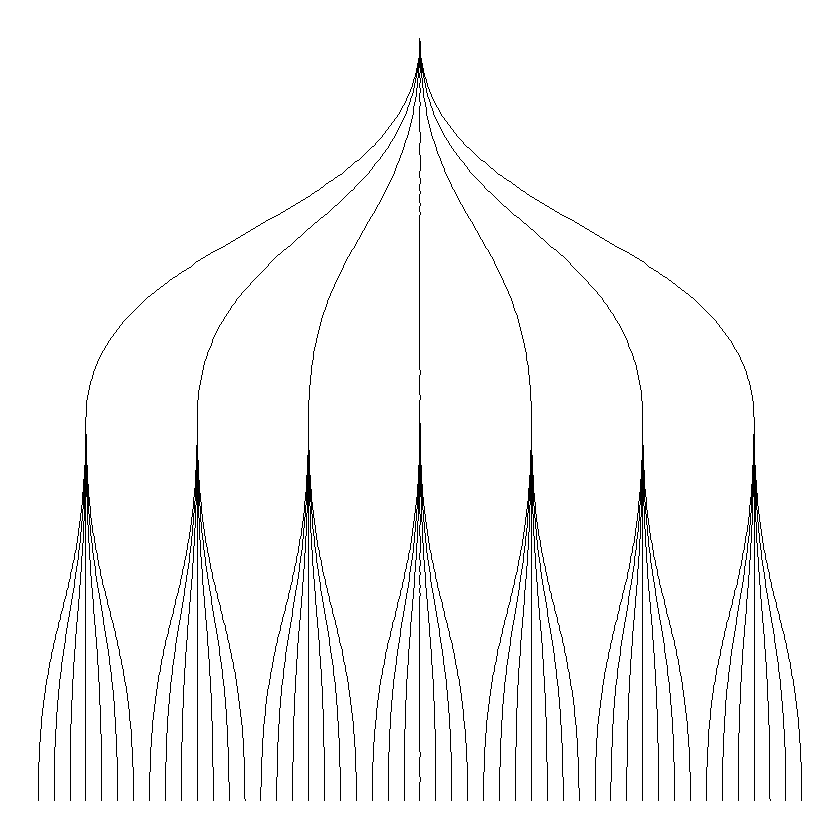

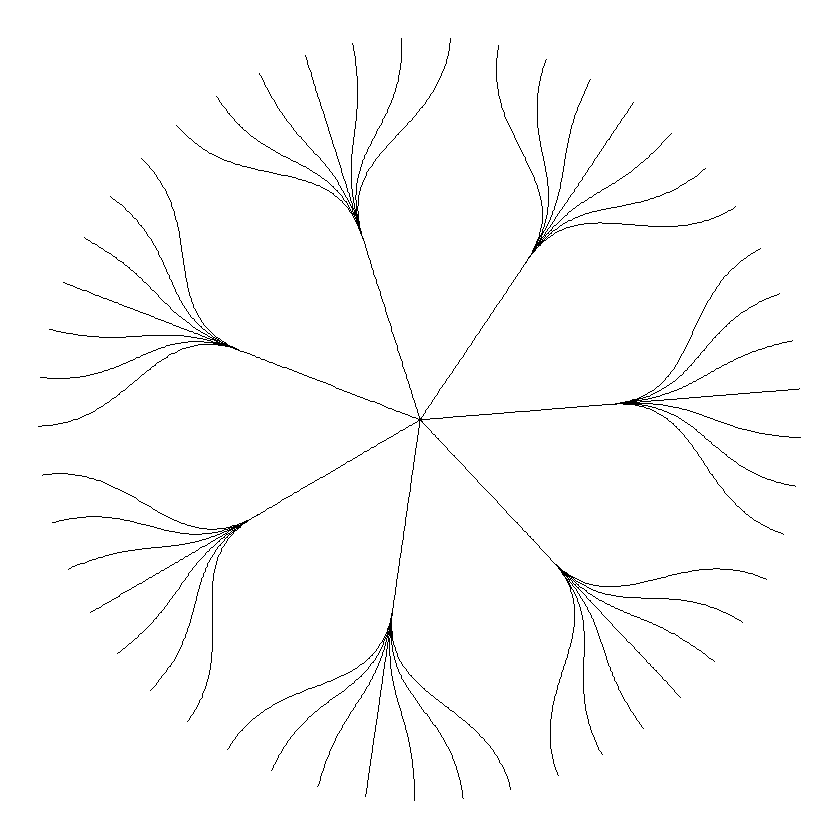

In [5]:
# Left
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() 
# Right
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal()

## **การกำหนด Edge style**

- #### โดยใช้ฟังก์ชั่น **geom_edge_link** และ **geom_edge_diagonal**

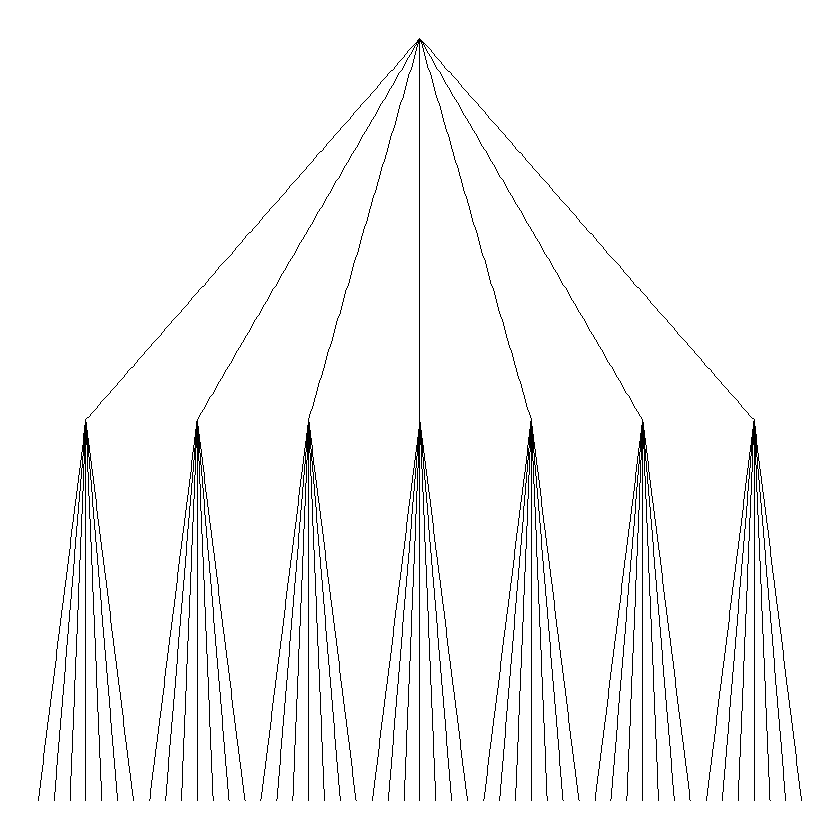

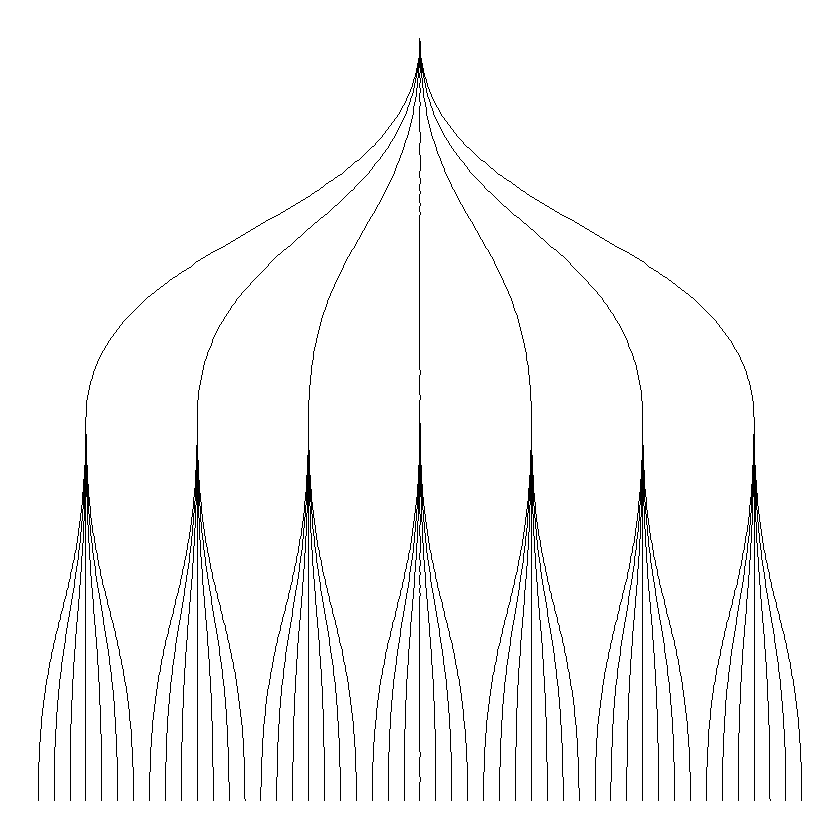

In [12]:
# Left
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_link()
# Right
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_diagonal()

## **การกำหนดลักษณะของ label และ nodes**

- #### โดยใช้ฟังก์ชั่น **the geom_node_text** และ **geom_node_point**

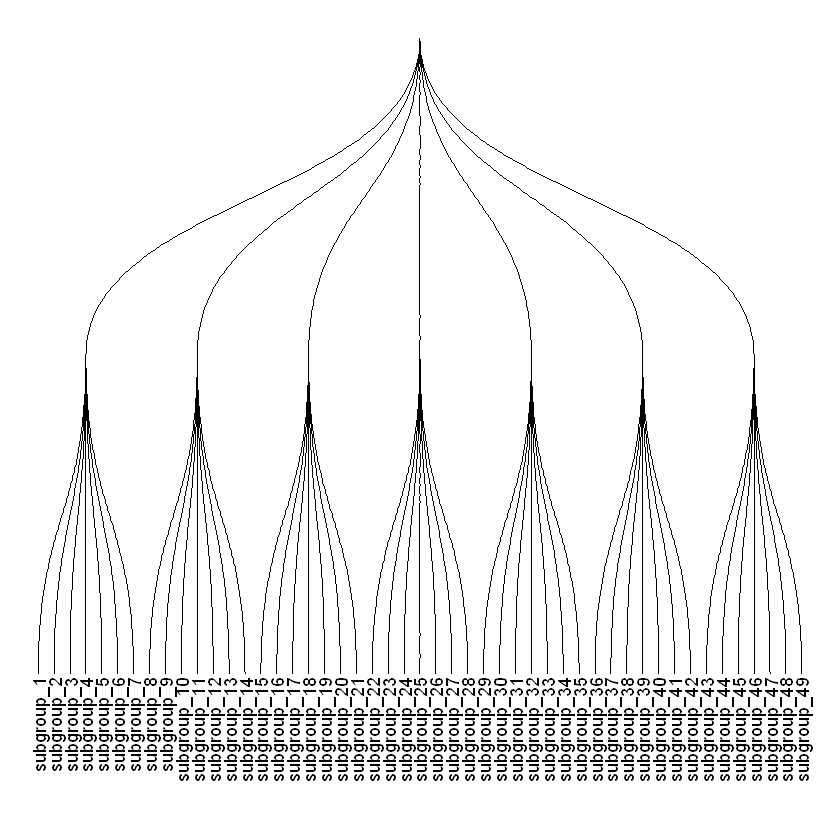

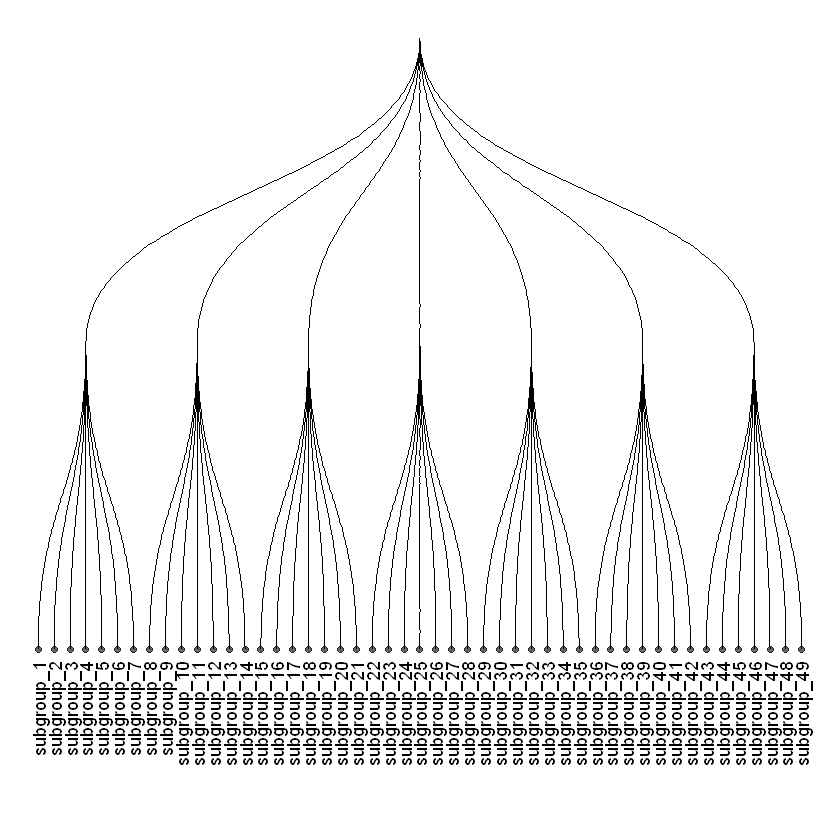

In [14]:
# Left
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_diagonal() +
  geom_node_text(aes( label=name, filter=leaf) , angle=90 , hjust=1, nudge_y = -0.01) +
  ylim(-.4, NA)
# Right
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_diagonal() +
  geom_node_text(aes( label=name, filter=leaf) , angle=90 , hjust=1, nudge_y = -0.04) +
  geom_node_point(aes(filter=leaf) , alpha=0.6) +
  ylim(-.5, NA)

## **การกำหนด Aesthetics**

- #### สามารถกำหนดโดยใช้ shape, size, color ในฟังก์ชั่น aes() ได้เลย

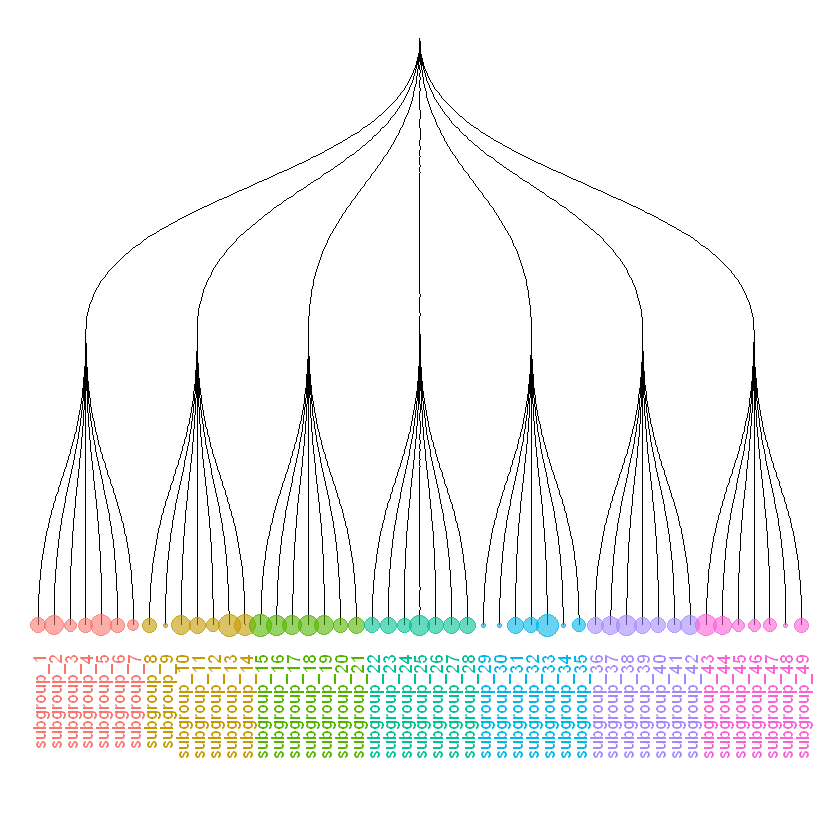

In [15]:
ggraph(mygraph, layout = 'dendrogram') + 
  geom_edge_diagonal() +
  geom_node_text(aes( label=name, filter=leaf, color=group) , angle=90 , hjust=1, nudge_y=-0.1) +
  geom_node_point(aes(filter=leaf, size=value, color=group) , alpha=0.6) +
  ylim(-.6, NA) +
  theme(legend.position="none")